In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
import os

# Spearman Correlation

In [2]:
ds = xr.open_dataset('/home/giantstep5/rjones98/meteorology/ESS569/ai_ready/AI_ready_dataset.nc')
ds

<xarray.Dataset> Size: 1GB
Dimensions:        (time: 2920, lat: 52, lon: 94)
Coordinates:
  * lat            (lat) float64 416B 24.5 25.0 25.5 26.0 ... 49.0 49.5 50.0
  * lon            (lon) float64 752B -125.0 -124.4 -123.8 ... -67.5 -66.88
  * time           (time) datetime64[ns] 23kB 2023-01-01 ... 2023-12-31T21:00:00
Data variables: (12/20)
    cape           (time, lat, lon) float64 114MB ...
    precipitation  (time, lat, lon) float32 57MB ...
    BCCMASS        (time, lat, lon) float32 57MB ...
    BCSMASS        (time, lat, lon) float32 57MB ...
    DUCMASS        (time, lat, lon) float32 57MB ...
    DUCMASS25      (time, lat, lon) float32 57MB ...
    ...             ...
    SSCMASS        (time, lat, lon) float32 57MB ...
    SSCMASS25      (time, lat, lon) float32 57MB ...
    SSSMASS        (time, lat, lon) float32 57MB ...
    SSSMASS25      (time, lat, lon) float32 57MB ...
    ltg            (time, lat, lon) float64 114MB ...
    energy         (time, lat, lon) float64 114MB ...
Attributes:
    regrid_method:  conservative

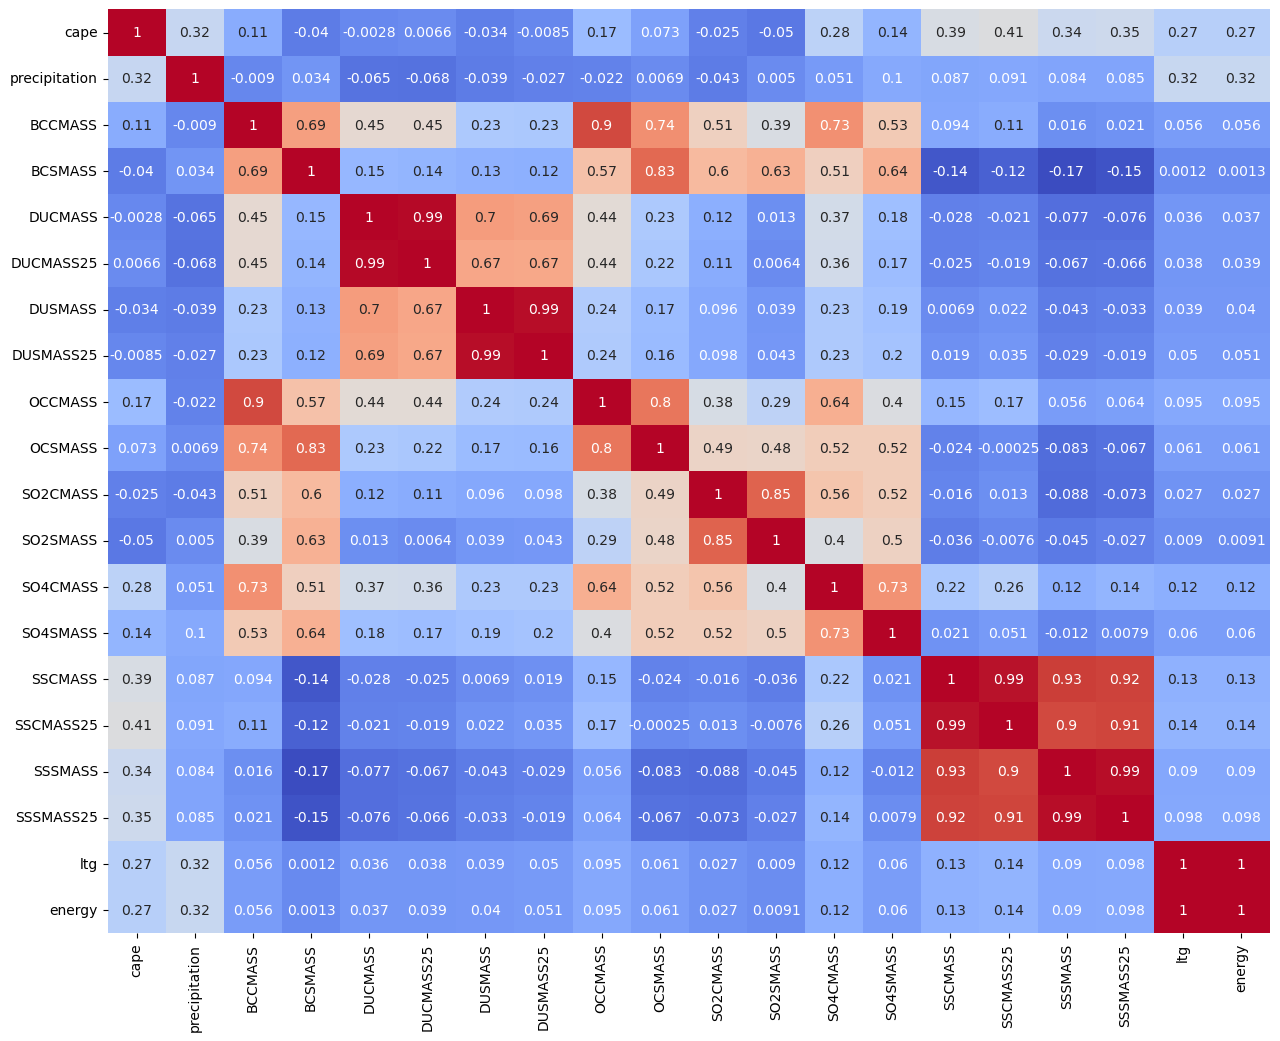

In [3]:
import xarray as xr
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the variables from the dataset
variables = ['cape', 'precipitation', 'BCCMASS', 'BCSMASS', 'DUCMASS', 'DUCMASS25', 'DUSMASS', 'DUSMASS25', 'OCCMASS', 'OCSMASS', 'SO2CMASS', 'SO2SMASS', 'SO4CMASS', 'SO4SMASS', 'SSCMASS', 'SSCMASS25', 'SSSMASS', 'SSSMASS25', 'ltg', 'energy']
data = [ds[var].values.flatten() for var in variables]

# Calculate the Spearman correlation matrix
corr_matrix, p_values = spearmanr(data, axis=1)

# Convert the correlation matrix into an xarray for better visualization
corr_xr = xr.DataArray(
    corr_matrix,
    dims=['variable_1', 'variable_2'],
    coords={'variable_1': variables, 'variable_2': variables},
    name="Spearman_correlation"
)

plt.figure(figsize=(15, 12))
sns.heatmap(corr_xr, annot=True, cmap='coolwarm',cbar=False, xticklabels=corr_xr.coords['variable_2'].values, yticklabels=corr_xr.coords['variable_1'].values)
plt.show()

The Spearman correlation shows some strong correlations between a few variables, indicating that they may not all be necessary. In a majority of cases, the column mass densities (CMASS) and surface mass concentrations (SMASS) are highly correlated to each other when looking at an individual species, with the lowest value being 0.67 between DUCMASS25 and DUSMASS25 As such, only the CMASS variables will be used going forward. Additionally, the total dust (DU) and fine dust (DU..25) variables are highly correlated to each other, so only the DU variable will be used. The same is the case for sea salt (SS) and fine sea salt (SS..25), so only SS will be used.

None of the input variables are highly correlated with the target variable (lightning).

Lightning and energy are perfectly correlated, which makes sense as lightning flashes produce almost the same amount of energy. As such, only the lightning variable will be used going forward.

# Summary Statistics

In [4]:
print('Mean lightning stroke density:',ds.ltg.mean().values,'strokes/(km^2*yr)')
print('Mean precipitation rate:',ds.precipitation.mean().values,'mm/hr')
print('Mean CAPE value',ds.cape.mean().values,'J/kg')
print('Mean black carbon column mass density',ds.BCCMASS.mean().values,'kg/m^2')
print('Mean dust column mass density',ds.DUCMASS.mean().values,'kg/m^2')
print('Mean organic carbon column mass density',ds.OCCMASS.mean().values,'kg/m^2')
print('Mean sulfur dioxide column mass density',ds.SO2CMASS.mean().values,'kg/m^2')
print('Mean sulfate column mass density',ds.SO4CMASS.mean().values,'kg/m^2')
print('Mean sea salt column mass density',ds.SSCMASS.mean().values,'kg/m^2')

Mean lightning stroke density: 0.0007128158165772138 strokes/(km^2*yr)
Mean precipitation rate: 0.09604294 mm/hr
Mean CAPE value 204.52257062845575 J/kg
Mean black carbon column mass density 7.8455315e-07 kg/m^2
Mean dust column mass density 1.984686e-05 kg/m^2
Mean organic carbon column mass density 7.694243e-06 kg/m^2
Mean sulfur dioxide column mass density 2.3220773e-06 kg/m^2
Mean sulfate column mass density 4.571037e-06 kg/m^2
Mean sea salt column mass density 1.2216908e-05 kg/m^2


In [5]:
print('Maximum lightning stroke density:',ds.ltg.max().values,'strokes/(km^2*yr)')
print('Maximum precipitation rate:',ds.precipitation.max().values,'mm/hr')
print('Maximum CAPE value',ds.cape.max().values,'J/kg')
print('Maximum black carbon column mass density',ds.BCCMASS.max().values,'kg/m^2')
print('Maximum dust column mass density',ds.DUCMASS.max().values,'kg/m^2')
print('Maximum organic carbon column mass density',ds.OCCMASS.max().values,'kg/m^2')
print('Maximum sulfur dioxide column mass density',ds.SO2CMASS.max().values,'kg/m^2')
print('Maximum sulfate column mass density',ds.SO4CMASS.max().values,'kg/m^2')
print('Maximum sea salt column mass density',ds.SSCMASS.max().values,'kg/m^2')

Maximum lightning stroke density: 4.244053474709398 strokes/(km^2*yr)
Maximum precipitation rate: 32.99309158325195 mm/hr
Maximum CAPE value 7999.024472548586 J/kg
Maximum black carbon column mass density 9.919237345457077e-05 kg/m^2
Maximum dust column mass density 0.0011789635755121708 kg/m^2
Maximum organic carbon column mass density 0.002155975205823779 kg/m^2
Maximum sulfur dioxide column mass density 0.00017166622274089605 kg/m^2
Maximum sulfate column mass density 0.00010706226021284238 kg/m^2
Maximum sea salt column mass density 0.002563064219430089 kg/m^2


In [6]:
print('Minimum lightning stroke density:',ds.ltg.min().values,'strokes/(km^2*yr)')
print('Minimum precipitation rate:',ds.precipitation.min().values,'mm/hr')
print('Minimum CAPE value',ds.cape.min().values,'J/kg')
print('Minimum black carbon column mass density',ds.BCCMASS.min().values,'kg/m^2')
print('Minimum dust column mass density',ds.DUCMASS.min().values,'kg/m^2')
print('Minimum organic carbon column mass density',ds.OCCMASS.min().values,'kg/m^2')
print('Minimum sulfur dioxide column mass density',ds.SO2CMASS.min().values,'kg/m^2')
print('Minimum sulfate column mass density',ds.SO4CMASS.min().values,'kg/m^2')
print('Minimum sea salt column mass density',ds.SSCMASS.min().values,'kg/m^2')

Minimum lightning stroke density: 0.0 strokes/(km^2*yr)
Minimum precipitation rate: 0.0 mm/hr
Minimum CAPE value 9.550139713170654e-13 J/kg
Minimum black carbon column mass density 6.157729615097196e-08 kg/m^2
Minimum dust column mass density 2.790930153651061e-08 kg/m^2
Minimum organic carbon column mass density 1.9012323093647865e-07 kg/m^2
Minimum sulfur dioxide column mass density 1.591708631565325e-08 kg/m^2
Minimum sulfate column mass density 3.52724526919701e-07 kg/m^2
Minimum sea salt column mass density 6.149291298385151e-09 kg/m^2


In [7]:
print('Variance in lightning stroke density:',(ds.ltg.std().values)**2,'strokes/(km^2*yr)')
print('Variance in precipitation rate:',(ds.precipitation.std().values)**2,'mm/hr')
print('Variance in CAPE value',(ds.cape.std().values)**2,'J/kg')
print('Variance in black carbon column mass density',(ds.BCCMASS.std().values)**2,'kg/m^2')
print('Variance in dust column mass density',(ds.DUCMASS.std().values)**2,'kg/m^2')
print('Variance in organic carbon column mass density',(ds.OCCMASS.std().values)**2,'kg/m^2')
print('Variance in sulfur dioxide column mass density',(ds.SO2CMASS.std().values)**2,'kg/m^2')
print('Variance in sulfate column mass density',(ds.SO4CMASS.std().values)**2,'kg/m^2')
print('Variance in sea salt column mass density',(ds.SSCMASS.std().values)**2,'kg/m^2')

Variance in lightning stroke density: 0.0001562863685821932 strokes/(km^2*yr)
Variance in precipitation rate: 0.27500210708240047 mm/hr
Variance in CAPE value 337772.2072416289 J/kg
Variance in black carbon column mass density 9.379946520656796e-13 kg/m^2
Variance in dust column mass density 4.999772465977281e-10 kg/m^2
Variance in organic carbon column mass density 3.494767088835063e-10 kg/m^2
Variance in sulfur dioxide column mass density 7.330132801173758e-12 kg/m^2
Variance in sulfate column mass density 7.461553035943948e-12 kg/m^2
Variance in sea salt column mass density 4.194027537034171e-10 kg/m^2


These statistics all show that the datasets are all skewed towards zero, as the minimums are all relatively close to the mean values, while the maximums are far away. Additionally, the variances are very low for all variables except CAPE, indicating that most of the values in the respective variables are close to the mean.

# Feature Distributions

## Histograms

Text(0, 0.5, '# of Observations')

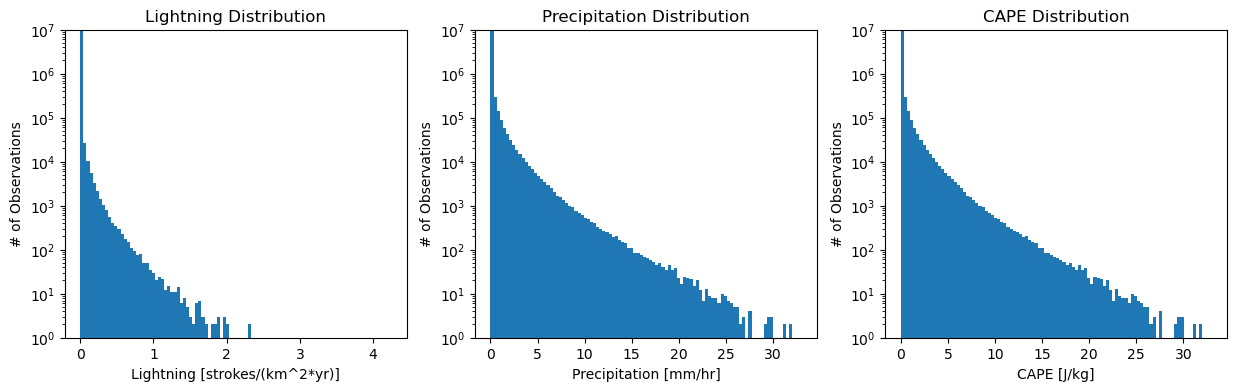

In [8]:
#Meteorological Variables
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(ds.ltg.values.ravel(), bins=100)
axs[0].set_ylim([1E0, 1E7])
axs[0].set_title('Lightning Distribution', fontsize=12)
axs[0].set_xlabel('Lightning [strokes/(km^2*yr)]')
axs[0].set_yscale('log')
axs[0].set_ylabel('# of Observations', fontsize=10)

axs[1].hist(ds.precipitation.values.ravel(), bins=100)
axs[1].set_ylim([1E0, 1E7])
axs[1].set_title('Precipitation Distribution', fontsize=12)
axs[1].set_xlabel('Precipitation [mm/hr]')
axs[1].set_yscale('log')
axs[1].set_ylabel('# of Observations', fontsize=10)

axs[2].hist(ds.precipitation.values.ravel(), bins=100)
axs[2].set_ylim([1E0, 1E7])
axs[2].set_title('CAPE Distribution', fontsize=12)
axs[2].set_xlabel('CAPE [J/kg]')
axs[2].set_yscale('log')
axs[2].set_ylabel('# of Observations', fontsize=10)

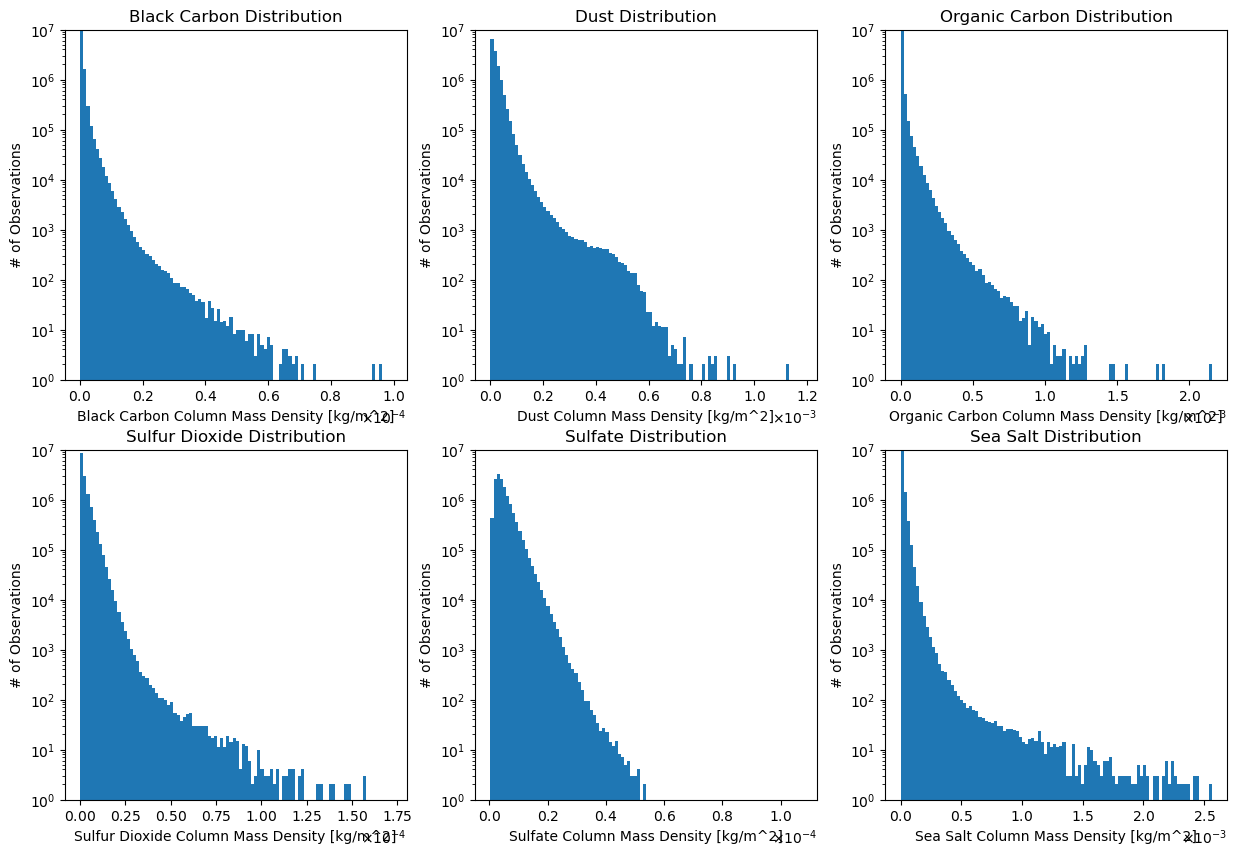

In [9]:
#Aerosol Concentrations
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].hist(ds.BCCMASS.values.ravel(), bins=100)
axs[0, 0].set_ylim([1E0, 1E7])
axs[0, 0].set_title('Black Carbon Distribution', fontsize=12)
axs[0, 0].set_xlabel('Black Carbon Column Mass Density [kg/m^2]')
axs[0, 0].set_yscale('log')
axs[0, 0].set_ylabel('# of Observations', fontsize=10)
axs[0, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 0].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

axs[0, 1].hist(ds.DUCMASS.values.ravel(), bins=100)
axs[0, 1].set_ylim([1E0, 1E7])
axs[0, 1].set_title('Dust Distribution', fontsize=12)
axs[0, 1].set_xlabel('Dust Column Mass Density [kg/m^2]')
axs[0, 1].set_yscale('log')
axs[0, 1].set_ylabel('# of Observations', fontsize=10)
axs[0, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 1].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

axs[0, 2].hist(ds.OCCMASS.values.ravel(), bins=100)
axs[0, 2].set_ylim([1E0, 1E7])
axs[0, 2].set_title('Organic Carbon Distribution', fontsize=12)
axs[0, 2].set_xlabel('Organic Carbon Column Mass Density [kg/m^2]')
axs[0, 2].set_yscale('log')
axs[0, 2].set_ylabel('# of Observations', fontsize=10)
axs[0, 2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[0, 2].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

axs[1, 0].hist(ds.SO2CMASS.values.ravel(), bins=100)
axs[1, 0].set_ylim([1E0, 1E7])
axs[1, 0].set_title('Sulfur Dioxide Distribution', fontsize=12)
axs[1, 0].set_xlabel('Sulfur Dioxide Column Mass Density [kg/m^2]')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylabel('# of Observations', fontsize=10)
axs[1, 0].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1, 0].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

axs[1, 1].hist(ds.SO4CMASS.values.ravel(), bins=100)
axs[1, 1].set_ylim([1E0, 1E7])
axs[1, 1].set_title('Sulfate Distribution', fontsize=12)
axs[1, 1].set_xlabel('Sulfate Column Mass Density [kg/m^2]')
axs[1, 1].set_yscale('log')
axs[1, 1].set_ylabel('# of Observations', fontsize=10)
axs[1, 1].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1, 1].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

axs[1, 2].hist(ds.SSCMASS.values.ravel(), bins=100)
axs[1, 2].set_ylim([1E0, 1E7])
axs[1, 2].set_title('Sea Salt Distribution', fontsize=12)
axs[1, 2].set_xlabel('Sea Salt Column Mass Density [kg/m^2]')
axs[1, 2].set_yscale('log')
axs[1, 2].set_ylabel('# of Observations', fontsize=10)
axs[1, 2].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
axs[1, 2].ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

Note: the y-axis for the above plots are log-scaled in order to better show the data. All of the data has a majority of observations at low values. The goal of the study will be to figure out if peaks in the aerosol concentrations correspond to peaks in lightning activity. Since there are hundreds of observations where both lightning and aerosol concentrations are relatively high, investigation will be worthwhile. 

## Annual Mean Maps

The GeoPandas package is used to create the following maps. In order to have country borders appear on maps, a group of shapefiles must be added to a folder. All shapefiles must be located in the folder in order for the following commands to work, even though only one will be used.

In [10]:
PATH_TO_SHAPEFILE = '/home/giantstep2/rjones98/data/WorldCountriesBoundaries/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp'
countries = gpd.read_file(PATH_TO_SHAPEFILE)

Text(0.5, 1.0, 'CAPE Climatology')

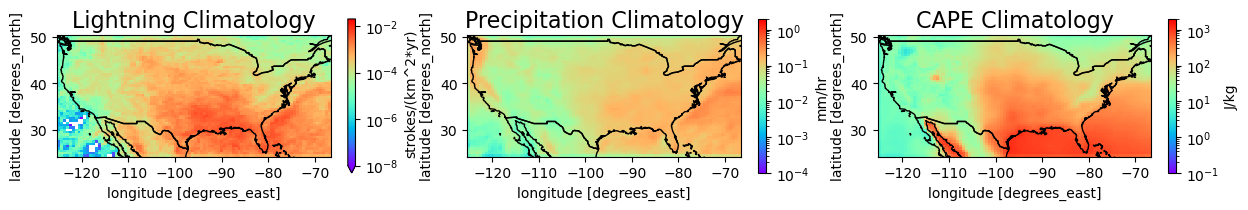

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 2))

# Set up the base map for the subplots
for i in range(0, 3):
    base = countries.plot(color=(1, 1, 1, 0.0), edgecolor='black', zorder=2, ax=axs[i])

# Plot data onto thubplots
ds.ltg.mean(dim='time').plot(ax=axs[0], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=1E-8, vmax=2E-2), cbar_kwargs={'label': 'strokes/(km^2*yr)'})
ds.precipitation.mean(dim='time').plot(ax=axs[1], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=1E-4, vmax=2E0), cbar_kwargs={'label': 'mm/hr'})
ds.cape.mean(dim='time').plot(ax=axs[2], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=1E-1, vmax=2E3), cbar_kwargs={'label': 'J/kg'})

# Set the title for the subplots
axs[0].set_title('Lightning Climatology', fontsize=16)
axs[1].set_title('Precipitation Climatology', fontsize=16)
axs[2].set_title('CAPE Climatology', fontsize=16)

The maps of the meteorological variables show some interesting patterns. Namely, CAPE values are high in the eastern United States, the Gulf of Mexico and the North Atlantic. Precipitation values are high in the same regions, but also are high on the West Coast, which is not seen in the CAPE values. Lightning values are also high in the eastern United States, Gulf of Mexico and North Atlantic. 

The colorbars on the maps are log_scaled, so changes in color represent changes in the magnitude of the variable.

Text(0.5, 1.0, 'Sea Salt Climatology')

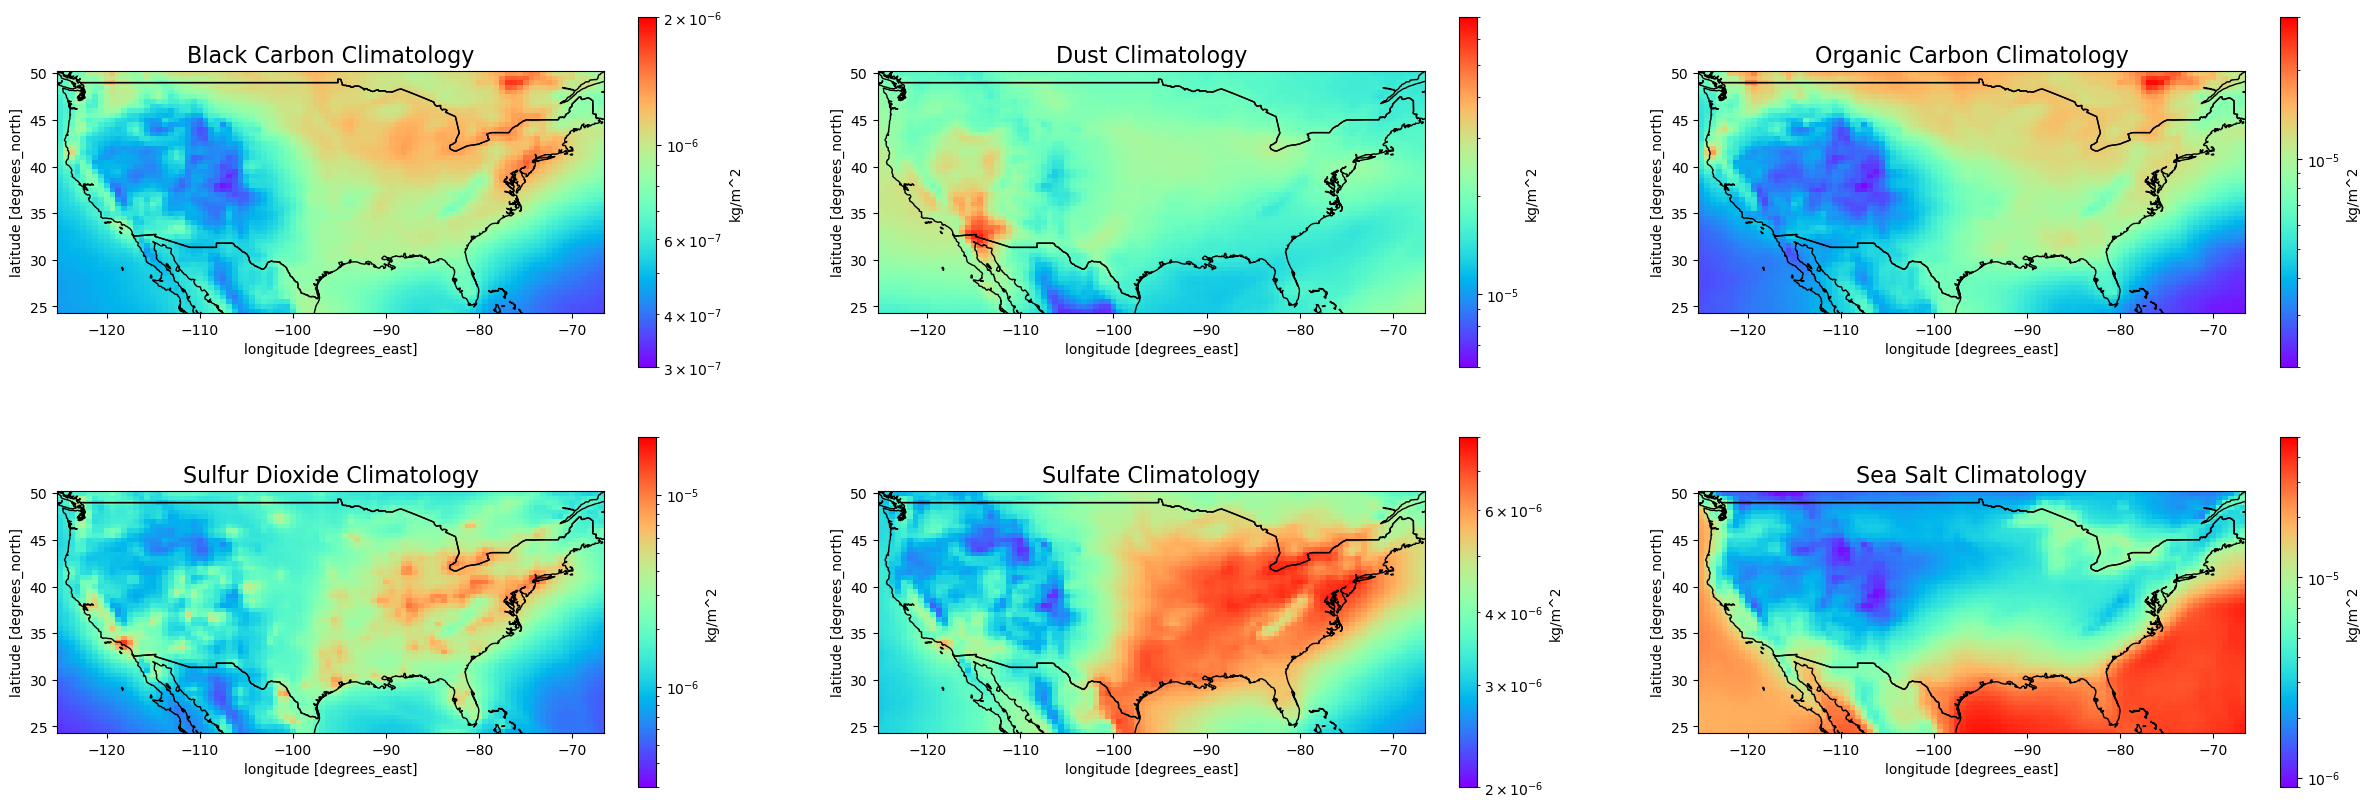

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(30,10))

# Set up the base map for the subplots
for j in range(0, 2):
    for k in range(0, 3):
        base = countries.plot(color=(1, 1, 1, 0.0), edgecolor='black', zorder=2, ax=axs[j, k])

# Plot data onto thubplots
ds.BCCMASS.mean(dim='time').plot(ax=axs[0, 0], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=3E-7, vmax=2E-6), cbar_kwargs={'label': 'kg/m^2'})
ds.DUCMASS.mean(dim='time').plot(ax=axs[0, 1], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=6E-6, vmax=7E-5), cbar_kwargs={'label': 'kg/m^2'})
ds.OCCMASS.mean(dim='time').plot(ax=axs[0, 2], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=2E-6, vmax=3E-5), cbar_kwargs={'label': 'kg/m^2'})
ds.SO2CMASS.mean(dim='time').plot(ax=axs[1, 0], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=3E-7, vmax=2E-5), cbar_kwargs={'label': 'kg/m^2'})
ds.SO4CMASS.mean(dim='time').plot(ax=axs[1, 1], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=2E-6, vmax=8E-6), cbar_kwargs={'label': 'kg/m^2'})
ds.SSCMASS.mean(dim='time').plot(ax=axs[1, 2], cmap='rainbow', zorder=1, norm=colors.LogNorm(vmin=9E-7, vmax=5E-5), cbar_kwargs={'label': 'kg/m^2'})

# Set the title for the subplots
axs[0, 0].set_title('Black Carbon Climatology', fontsize=16)
axs[0, 1].set_title('Dust Climatology', fontsize=16)
axs[0, 2].set_title('Organic Carbon Climatology', fontsize=16)
axs[1, 0].set_title('Sulfur Dioxide Climatology', fontsize=16)
axs[1, 1].set_title('Sulfate Climatology', fontsize=16)
axs[1, 2].set_title('Sea Salt Climatology', fontsize=16)

The maps show vastly different distributions for aerosol species, with no two species sharing similar distribution patterns. Interestingly, the sulfate map shows higher values in the regions with high CAPE, precipitation and lightning, so it must be examined the extent to which the sulfate concentrations are having a bigger impact than the CAPE and precipitation values.

Once again, the colorbars are log-scaled.